In [5]:
%matplotlib inline

from benchmarking_data_generation import npi_level_summary_statistics, aggregate_sessions

### NPI-level "Model"

In [2]:
# load sample list of NPIs 
import pandas as pd
visitors = pd.read_csv('../data/visitors.csv')
visitors.columns = [x.strip() for x in visitors.columns]
npi_sample = list(visitors[~visitors.npi_number.isnull()].npi_number.sample(1000))

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,6,7,8,11,12,13,14,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# process NPI list to generate summary statistics
npis = npi_level_summary_statistics(npis=npi_sample)

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (5,6,7,8,11,12,13,14,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
benchmarking_data_generation.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  v['has_event'] = v.dg_id.apply(lambda x: 1 if x in event_dgids else 0)


In [7]:
# this df is formatted to be used in Tableau as is
npis.head()

,dg_id,identity_type,professional_designation,npi_number,primary_specialty,primary_specialty_group,birth_year,grad_year,gender,has_event,...,frequency_category,frequency_category_q1,frequency_category_q2,frequency_category_april,frequency_category_february,frequency_category_july,frequency_category_june,frequency_category_march,frequency_category_may,persona
0,U080006655,AUT,Physician,1.568417e+09,Psychiatry (P),Psychiatry,1951,1982,F,1,...,1-10 times per month,Less than 1 visit a month,1-10 times per month,1-10 times per month,Less than 1 visit a month,Less than 1 visit a month,1-10 times per month,Less than 1 visit a month,1-10 times per month,bookworm
1,U080007284,AUT,Physician,1.205898e+09,Psychiatry (P),Psychiatry,1948,1974,M,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U080009992,AUT,Physician,1.326176e+09,Occupational Medicine (OM),Preventive Medicine,1952,1985,M,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,U080012424,AUT,Physician,1.902088e+09,Anesthesiology (AN),Anesthesiology,1955,1984,F,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,U080013881,AUT,Physician,1.508127e+09,Pulmonary Disease (PUD),Internal Medicine,1962,1986,M,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# stuff we care about in this data (i.e. stuff in the Tableau dashboard)

npis.frequency_category.value_counts()

Less than 1 visit a month    47
1-10 times per month         11
More than 10x per month       1
Name: frequency_category, dtype: int64

In [9]:
npis.persona.value_counts()

bookworm     50
unicorn       6
butterfly     3
Name: persona, dtype: int64

In [11]:
npis.has_event.value_counts()

0    966
1     59
Name: has_event, dtype: int64

In [14]:
npis.primary_specialty_group.value_counts().head()

Midlevel                            264
Internal Medicine                   148
Family Medicine/General Practice     89
Pediatrics                           65
Emergency Medicine                   49
Name: primary_specialty_group, dtype: int64

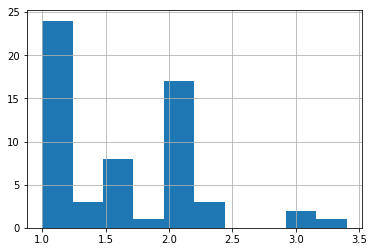

In [19]:
npis.urls_per_session.hist()

### Session-level "Model"

In [2]:
agg = aggregate_sessions()

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (5,6,7,8,11,12,13,14,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
agg.head()

,visitor_id,dg_id,identity_type,professional_designation,npi_number,primary_specialty,primary_specialty_group,secondary_specialty,secondary_specialty_group,first_name,...,category_url,site_category,site_sub_category,disease_category,disease,pharma_firm,use_case,quarter,page_views,persona
0,3538,R0000000026,POI,Nurse,NaN,NaN,NaN,NaN,NaN,SHARON,...,www.ReachMD.com,Multi-Channel Marketing,Multi Topic,Multiple,NaN,NaN,publications_ed_tools,q1,1,bookworm
1,3562,R0000000098,POI,Nurse,NaN,NaN,NaN,NaN,NaN,KAREN,...,www.medicalnewstoday.com,Publisher,Multi Topic,Multiple,NaN,NaN,publications_ed_tools,q1,1,bookworm
2,3653,R0000000358,POI,Nurse,NaN,NaN,NaN,NaN,NaN,PROSPECTIVE STUDENT,...,www.healthjobsnationwide.com,Recruiter,Multi Topic,Multiple,NaN,NaN,professional_social_media,q1,1,butterfly
3,3783,R0000000651,POI,Nurse,NaN,NaN,NaN,NaN,NaN,PROSPECTIVE STUDENT,...,www.consultant360.com,Publisher,Multi Topic,Multiple,NaN,NaN,publications_ed_tools,q2,2,bookworm
4,3783,R0000000651,POI,Nurse,NaN,NaN,NaN,NaN,NaN,PROSPECTIVE STUDENT,...,www.consultant360.com,Publisher,Multi Topic,Multiple,NaN,NaN,publications_ed_tools,q2,1,bookworm


In [4]:
agg.site_category.value_counts()

Publisher                  478165
Multi-Channel Marketing    106255
Reference Tool              84822
Pharma                      45689
Recruiter                   14899
Professional Social         13964
Medical Education            9060
Medical Association          8955
Med Device                    134
Name: site_category, dtype: int64

In [6]:
agg.disease_category.value_counts().head()

Multiple         612039
Oncology          26886
Psychiatry        20978
Endocrinology     16805
Cardiology        13670
Name: disease_category, dtype: int64

In [7]:
agg.use_case.value_counts()

publications_ed_tools        678302
pharma_device                 45823
professional_social_media     37818
other                         10163
Name: use_case, dtype: int64

In [8]:
agg.persona.value_counts()

bookworm     713349
unicorn       32031
butterfly     24853
cat?           1873
Name: persona, dtype: int64

### Personas

In [4]:
from personas import get_personas
import utils

# this function is typically called within other functions and not stand-alone, so we need to load the data first
visitors, events, devices, url_categories = utils.load_data(event_categories=True)
event_sessions = aggregate_sessions(visitors=visitors, events=events)

personas = get_personas(event_sessions=event_sessions, visitors=visitors)

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (5,6,7,8,11,12,13,14,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
personas.head()

,dg_id,use_case,primary_specialty,total_sessions,use_case_counts,pharma,publications,social,total_3d,pharma_pct,pubs_pct,social_pct,ternary_coordinates,persona,ternary_x,ternary_y
0,R0000000026,[publications_ed_tools],NaN,1,{u'publications_ed_tools': 1},0,1,0,1,0.0,1.0,0.0,"(1.0, 0.0)",bookworm,1.0,0.000000
1,R0000000098,[publications_ed_tools],NaN,1,{u'publications_ed_tools': 1},0,1,0,1,0.0,1.0,0.0,"(1.0, 0.0)",bookworm,1.0,0.000000
2,R0000000358,[professional_social_media],NaN,1,{u'professional_social_media': 1},0,0,1,1,0.0,0.0,1.0,"(0.5, 0.866025403784)",butterfly,0.5,0.866025
3,R0000000651,"[publications_ed_tools, publications_ed_tools,...",NaN,20,{u'publications_ed_tools': 20},0,20,0,20,0.0,1.0,0.0,"(1.0, 0.0)",bookworm,1.0,0.000000
4,R0000000720,[publications_ed_tools],NaN,1,{u'publications_ed_tools': 1},0,1,0,1,0.0,1.0,0.0,"(1.0, 0.0)",bookworm,1.0,0.000000


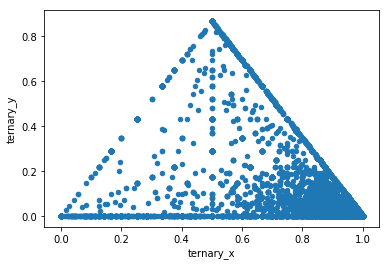

In [8]:
# this data is used to plot the personas in tableau (ternary_x, ternary_y are the cartesian coordinates)
# bottom right represents the "bookworms", left is the "unicorns", and top are the "butterflies"

personas.plot.scatter(x='ternary_x', y='ternary_y')

### % Authenticated Sessions

In [1]:
from authorized_visits import monthly_aut_overall

In [2]:
aut = monthly_aut_overall()

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (5,6,7,8,11,12,13,14,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
authorized_visits.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  pharma['dt'] = pharma.timestamp.apply(lambda x: x.date())
/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [3]:
aut.head()

,dt_first_view,url,site_category,site_sub_category,disease_category,disease,sub_disease,pharma_firm,url_category_id,stripped_url,clean_url,month,authorized_visits,identified_visits,unk_sessions,total_visits,pct_authorized
0,12/19/16,www.dulera.com,Pharma,Branded Consumer,"Allergy & Immunology, \nOtolaryngology, Pulmo...",Lung Disease,Asthma,Merck,46,dulera,dulera.com,2,288,391,93647.0,94038.0,0.003063
1,12/19/16,www.dulera.com,Pharma,Branded Consumer,"Allergy & Immunology, \nOtolaryngology, Pulmo...",Lung Disease,Asthma,Merck,46,dulera,dulera.com,3,474,659,51286.0,51945.0,0.009125
2,12/19/16,www.dulera.com,Pharma,Branded Consumer,"Allergy & Immunology, \nOtolaryngology, Pulmo...",Lung Disease,Asthma,Merck,46,dulera,dulera.com,4,660,892,66348.0,67240.0,0.009816
3,12/19/16,www.dulera.com,Pharma,Branded Consumer,"Allergy & Immunology, \nOtolaryngology, Pulmo...",Lung Disease,Asthma,Merck,46,dulera,dulera.com,5,404,531,33946.0,34477.0,0.011718
4,12/19/16,www.dulera.com,Pharma,Branded Consumer,"Allergy & Immunology, \nOtolaryngology, Pulmo...",Lung Disease,Asthma,Merck,46,dulera,dulera.com,6,366,445,19930.0,20375.0,0.017963


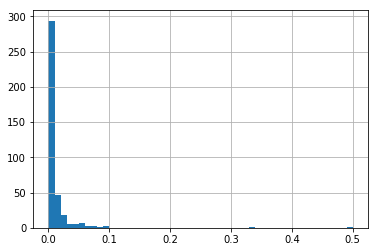

In [11]:
aut.pct_authorized.hist(bins=50)

In [13]:
# can group by disease to use as baseline comparison

aut.groupby('disease_category')[['authorized_visits', 'total_visits']].agg(['sum', 'count']).reset_index()

disease_category authorized_visits        \
                                                                    sum count   
0   Allergy & Immunology, \nOtolaryngology,  Pulmo...              3523    12   
1   Allergy & Immunology, Otolaryngology, Pulmonology               720     6   
2                                          Cardiology                69     6   
3                             Cardiology, Pulmonology               147     8   
4                                         Dermatology                96     3   
5                               Dermatology, Oncology              1197    12   
6                           Dermatology, Rheumatology              1789    17   
7                         Dermatology, Rheumatology\n                29     6   
8                                       Endocrinology              7110    48   
9                                    Gastroenterology              1444    14   
10                                 Infectious Disease              4661    57   
11                                           Multiple              1442    15   
12                                          Neurology               573    10   
13                            Obstetrics & Gynecology              7493    24   
14                                           Oncology              9343   140   
15             Oncology, Rheumatology, Otolaryngology               231     4   
16                                         Pediatrics               940    12   
17                                         Psychiatry              3954    18   
18                                       Rheumatology               128     4   
19                             Rheumatology, Oncology                20     6   
20                   Rheumatology, Oncology\nMultiple                28     6   
21                                            Urology               899    18   
22                      Urology, Cardiology, Oncology                19     5   
23  Urology, Cardiology, Oncology, Infectious Disease               237     4   

   total_visits        
            sum count  
0      581193.0    12  
1       48805.0     6  
2       19345.0     6  
3       51784.0     5  
4       16955.0     3  
5      300894.0    12  
6     1561525.0    17  
7        2781.0     6  
8     3603883.0    48  
9      371681.0    14  
10    2443000.0    51  
11     357870.0    13  
12     157625.0     6  
13    8458843.0    24  
14    3721178.0    89  
15      19404.0     2  
16     751890.0    12  
17    6280434.0    18  
18      78905.0     4  
19       1327.0     6  
20       1657.0     6  
21    1681946.0    18  
22        459.0     5  
23      54679.0     4

In [15]:
## can also group by pharma company

aut.groupby('pharma_firm')[['authorized_visits', 'total_visits']].agg(['sum', 'count']).reset_index()

pharma_firm authorized_visits       total_visits      
                                      sum count          sum count
0      Abbvie/Genentech                81     4       8616.0     4
1     Allergan/Ironwood                86     2      63207.0     2
2              Astellas              1669    48    1831987.0    46
3   Astellas/Medivation               302     6     101569.0     6
4       Astellas/Pfizer                27     5       9622.0     5
5                   BMS                 8     5       1238.0     5
6            BMS/Otsuka                 7     2       2206.0     2
7            BMS/Pfizer                78     2      44316.0     2
8                 Bayer                64     4       6770.0     2
9               Celgene              3616    53    1865701.0    35
10           EMD Serono                 2     2         40.0     2
11                Eisai               466    12      40927.0     6
12             Exelixis               320    12      52828.0    12
13            Genentech              2483    61     480799.0    34
14   Genentech/Astellas                70     2      13917.0     2
15     Genentech/Biogen               158     2      19404.0     2
16                Merck             36650   231   26024218.0   219
17  United Therapeutics                 5     2        698.0     1